In [1]:
# Importation des packages
import pandas as pd
import math                         # import a package
import numpy as np     
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import scipy.stats as stat 
import statsmodels.api as sm 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

1) Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table conte-
nant les 5 premières observations.

In [2]:
#--
filename = "https://bitbucket.org/portierf/shared_files/downloads/invest.txt"
fields   = ["year", "gnp", "invest", "cpi", "interest"]

#importation du fichier txt
df = pd.read_csv(filename, sep=' ', nrows=15, usecols=fields)

#affichage uniquement des 5ères valeurs
df.head(5)

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


=========================================================================================================================
2) Réaliser le graph suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse
et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes
en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.

Text(0,0.5,'invest')

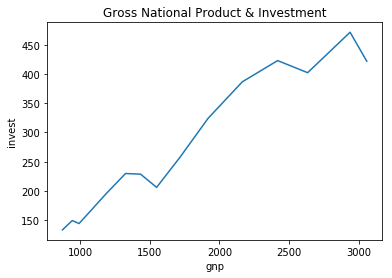

In [3]:
#--
# on récupère uniquement le log du gnp et de inv dans le dataframe
lnGnp = np.log(df['gnp'])
lnInv = np.log(df['invest'])

# on plot le jeu de données dans la forme initiale
plt.plot(df['gnp'] , df['invest'])
plt.title('Gross National Product & Investment')
plt.xlabel('gnp')
plt.ylabel('invest')

=========================================================================================================================
3) Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative,
covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination.
Les afficher dans une forme lisible. Dans la suite le vecteur contenant l’intercept et la pente est noté
θ̂ n P R 2 .

In [4]:
#-- 
n = len(lnInv) # utile tout au long de l'exercice

#la variable explicative et expliquée initiale
Ypt1 = lnInv
Xpt1 = lnGnp

# calcul des moyennes empiriques
x_bar = 1 / n * np.sum(Xpt1)
y_bar = 1 / n * np.sum(Ypt1)

# calcul du coefficient
covXY = (1 / n) * np.sum(Xpt1 * Ypt1) - (x_bar * y_bar) 
VarX  = (1 / n) * np.sum(Xpt1 * Xpt1) - (x_bar * x_bar)
Beta1 = covXY / VarX

# calcul de l'intercept
Interc = y_bar - Beta1 * x_bar

# concaténation des deux coefficients
Coefficients = np.array([Interc, Beta1])[np.newaxis]


# calcul du modèle estimé y_hat
y_estim = Coefficients[0][0] + Coefficients[0][1] * Xpt1

# calcul du résidu du modèle
epsilon     = Ypt1 - y_estim
epsilon_bar = 0 #par hypothese

#R² -> somme des carrés résiduels = somme des carrés empiriques / sommes des carrés totaux
SCE    = (1 / n) * np.sum((y_estim - y_bar) * (y_estim - y_bar))
SCR    = (1 / n) * np.sum((epsilon - epsilon_bar) * (epsilon - epsilon_bar))
SCT    = SCR + SCE 
Rcarre = SCE / SCT

# Ecart-type de X 
stdX = VarX ** 0.5 # surement erreur 

# variance des résidus du modèle
VarResidu = np.sum(epsilon ** 2) / (n - 2)

# écart-type des résidus
STDResidu = VarResidu ** 0.5

# les écart-types des coefficients
StdCoeff = math.sqrt(VarResidu / (n * VarX)) # std du coefficient
StdInter = math.sqrt(StdCoeff ** 2 * (VarX + x_bar ** 2))


print ('La valeur de l\'intercept est : ' + str(round(Coefficients[0][0],3)) + 
       '\n\t son écart-type associé vaut : ' + str(round(StdInter,3)))
print ('La valeur du coefficient est : ' + str(round(Coefficients[0][1],3)) + 
       '\n\t son écart-type associé vaut : ' + str(round(StdCoeff,3)))
print ('Le coefficient de détermination du modèle vaut : ' + str(round(Rcarre,3)))
       

La valeur de l'intercept est : -1.964
	 son écart-type associé vaut : 0.41
La valeur du coefficient est : 1.015
	 son écart-type associé vaut : 0.055
Le coefficient de détermination du modèle vaut : 0.963


=========================================================================================================================
4) La pente estimée précédemment est-elle statistiquement significative ? On fera un test de student
(t-test). Donner la valeur de la statistique de test ainsi que la p-valeur.

In [18]:
#--

alpha = 0.05 # pour calculer le risque de premiere espece

# la statistique de test à comparer à la loi 
tstat = Coefficients[0][1] / StdCoeff 

#loi de student
tst95 = stat.t.ppf((1-(alpha/2)),df=(n - 2)) # -> len(lnInv) - 2) equivaut à n-(p+1))

# calcul de la p-value, qui est la probabilité de rejeter H0 à tort
p_value = 2 * (1 - stat.t.cdf(tstat, (n - 2)))

print("La statistique de test vaut : " + str(round(tstat,3)))

if tstat > tst95:
    print('Rejet de H0, le coefficient est significativement différent de 0 au seuil 95%')
else:
    print('Non rejet de H0')
    
s = "La %s est égale à %.12f"
print(s % ("p-value", p_value))

La statistique de test vaut : 18.332
Rejet de H0, le coefficient est significativement différent de 0 au seuil 95%
La p-value est égale à 0.000000000114


=========================================================================================================================
5) Pour GNP égal à 1000, estimer l’investissement prédit par le modèle. Pour GNP égal à 1000, donner
l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à ex-
pliquer “Investment”, au niveau 90%. On pourra se référer à la section 3.1.3 “Confidence intervals
for the predicted values” du polycopié dans laquelle chaque intervalle est défini, CIpxq et PIpxq,
respectivement avec les notations du polycopié

In [17]:
#--
#calcul du modele prédit
Prediction1 = Coefficients[0][0] + Coefficients[0][1] * math.log(1000)

alpha2 = 0.1

#fonctions pour calculer l'intervalle de confiance et de prévision

def CI(val):
    logVal      = np.log(val)
    val_sq      = (logVal - x_bar) * (logVal - x_bar)
    logPtGauche = Coefficients[0][0] + Coefficients[0][1] * logVal
    logEcartInt = stat.t.ppf(1 - alpha2 / 2, df = (n - 2)) * (VarResidu * (1 / n + val_sq)) ** 0.5
    logCIp      = logPtGauche + logEcartInt
    logCIm      = logPtGauche - logEcartInt
    return (np.exp(logCIp), np.exp(logCIm))

def PI(val):
    logVal      = np.log(val)
    val_sq      = (logVal - x_bar) * (logVal - x_bar)
    logPtGauche = Coefficients[0][0] + Coefficients[0][1] * logVal
    logEcartInt = stat.t.ppf(1 - alpha2 / 2, df = (n - 2)) * (VarResidu * (1 + 1 / n + val_sq)) ** 0.5
    logPIp      = logPtGauche + logEcartInt
    logPIm      = logPtGauche - logEcartInt
    return (np.exp(logPIp), np.exp(logPIm))

print("Valeur de l\'estimation quand la variable expliquée vaut log(1000) : " + str(math.exp(Prediction1)))

# Functions for CI and PI 
ci = CI(1000)
print("intervalle de confiance à 90% : ", round(ci[1],3), " | ", round(ci[0],3))

pi = PI(1000)
print("intervalle de prévision à 90% : ", round(pi[1],3), " | ", round(pi[0],3))

Valeur de l'estimation quand la variable expliquée vaut log(1000) : 155.9794279310537
intervalle de confiance à 90% :  143.414  |  169.646
intervalle de prévision à 90% :  130.75  |  186.077


=========================================================================================================================
6) Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer
les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de
log(GNP) comprises entre le maximum et le minimum observé sur les données)

Text(0.5,1,'OLS | IC | IP')

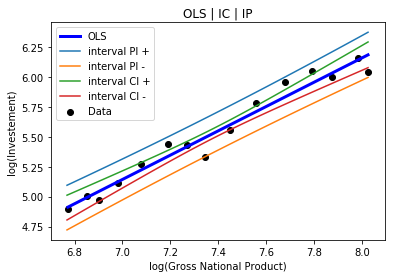

In [7]:
# Plot des IC et IP
# tout à été mis à l'echelle logarithmique
x_prime=np.linspace(870,3058,100)
plt.scatter(Xpt1, Ypt1, color = 'black', label = 'Data')
plt.plot(Xpt1,y_estim,  color = 'blue', linewidth=3, label = 'OLS')
plt.plot(np.log(x_prime), np.log(PI(x_prime)[0]), label = "interval PI +")
plt.plot(np.log(x_prime), np.log(PI(x_prime)[1]), label = "interval PI -")
plt.plot(np.log(x_prime), np.log(CI(x_prime)[0]), label = "interval CI +")
plt.plot(np.log(x_prime), np.log(CI(x_prime)[1]), label = "interval CI -")
plt.xlabel("log(Gross National Product)")
plt.ylabel("log(Investement)")
plt.legend()
plt.title('OLS | IC | IP')



=========================================================================================================================
7) En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de dé-
termination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000. La classe
LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que
les valeurs calculées ici coïncident avec celles des questions précédentes.

In [8]:
#--
# nécessaire pour effectuer le fit model
Xpt1 = Xpt1.values
Ypt1 = Ypt1.values
Xpt1 = Xpt1.reshape(15,1)
Ypt1 = Ypt1.reshape(15,1)

# utilisation de la class fit qui regresse X(le gnp) sur y (l'investissement)
regr1 = linear_model.LinearRegression()
regr1.fit(Xpt1, Ypt1)

# calcul du y_hat, le modèle estimé
Y_estim2 = regr1.predict(Xpt1)

# l'intercept
print('Intercept: \n', regr1.intercept_[0])
# la pente
print('Coefficients: \n', regr1.coef_[0][0])
# Coefficient de corrélation
print('R²: \n %.2f' % r2_score(Ypt1, Y_estim2))
# print('Variance score: %.2f' % regr.score(Xpt1, Ypt1)

# calcul du modèle predit quand gnp vaut 1000 
Prediction2 = regr1.intercept_ + regr1.coef_ * math.log(1000)
print("Valeur de l\'estimation quand la variable explicative vaut log(1000) : " + str(round(Prediction2[0][0],3)))

Intercept: 
 -1.9635913352301815
Coefficients: 
 1.015281401598871
R²: 
 0.96
Valeur de l'estimation quand la variable explicative vaut log(1000) : 5.05


=========================================================================================================================
8) Sur un graph avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer
les données, la droite de régression, ainsi que l’investissement prédit par le modèle quand GNP vaut
100 (on donnera à ce point une couleur différente).

Text(0.5,1,'OLS | log(1000)')

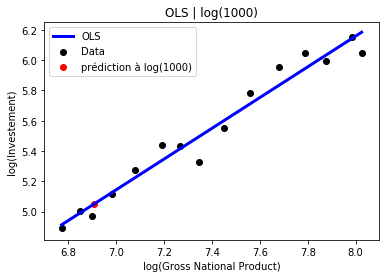

In [9]:
# --
# plot du modele
plt.scatter(Xpt1, Ypt1,  color='black', label = 'Data')
plt.plot(Xpt1, y_estim, color='blue', linewidth=3, label = 'OLS')
plt.scatter(math.log(1000), Prediction1, color='red', label = 'prédiction à log(1000)') # ajout du point prédit
plt.xlabel("log(Gross National Product)")
plt.ylabel("log(Investement)")
plt.legend()
plt.title('OLS | log(1000)')

=========================================================================================================================
9) Pour la régression de Investment sur GNP et interest, calculer la matrice de Gram. Est-elle de
rang plein ?

In [10]:
# création de la matrice GNP, Interest
Interest = np.array(df['interest'])[np.newaxis]
Xpt3     = np.concatenate((np.ones((15,1)), Xpt1, Interest.T), axis = 1)

# la matrice de gram est la matrice X'X
GramMat  = np.dot(Xpt3.T, Xpt3) #cas où l'on ne divise pas par n
GramMatn = GramMat / n #cas où l'on divise par n, on préfèrera ce cas

rng = np.linalg.matrix_rank(GramMatn) # calcul du rang de la matrice
eig = np.linalg.eig(GramMatn) #on récupère les valeurs propres
np.absolute(eig[0] > 10 ** -5) #si True, alors les valeurs propres sont différentes de 0

print('La matrice de Gram vaut : ')
print(GramMatn)
print(np.absolute(eig[0] > 10 ** -5))
print('Le rang de la Matrice de Gram est de : ' + str(rng) + ' elle est de plein rang')

La matrice de Gram vaut : 
[[ 1.          7.38352141  7.45266667]
 [ 7.38352141 54.68323179 55.94590287]
 [ 7.45266667 55.94590287 62.92371333]]
[ True  True  True]
Le rang de la Matrice de Gram est de : 3 elle est de plein rang


=========================================================================================================================
10) Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écart-
types ainsi que le coefficient de détermination. En plus, faire un test de Student de significativité
de chaque coefficient (donner la statistique de test et la p-valeur). Afficher les résultats dans une
forme convenable. Discuter de la significativité des coefficients.

In [19]:
#--
be1   = np.linalg.inv(np.dot(Xpt3.T,Xpt3))
be2   = np.dot(Xpt3.T, Ypt1)
Beta2 = np.dot(be1, be2) #calcul des coefficients du nouveau modèle

#y_hat du modèle
y_estim3 = np.dot(Xpt3, Beta2)

#résidus du modèle
epsilon2 = Ypt1 - y_estim3

SCE2    = (1 / n) * np.sum((y_estim3 - y_bar) * (y_estim3 - y_bar))
SCR2    = (1 / n) * np.sum((epsilon2 - epsilon_bar) * (epsilon2 - epsilon_bar)) #epsilon_bar = 0 
SCT2    = SCE2 + SCR2
Rcarre2 = 1 - (SCR / SCT)

VarResidu2 = SCR2 / (n - 3) #calcul de la variance des résidus
VarCoeff2  = np.sqrt(np.diag((np.linalg.inv(GramMatn)) * VarResidu2)) #calcul des écart-types
tstat2     = np.diag(Beta2 / VarCoeff2) #calcul des tstats

# partie stat de test et p-value
tst95_ = stat.t.ppf((1 - alpha / 2),df =(n - 3)) # -> len(lnInv) - 3) equivaut à n-(p+1))

print('Les coefficients du modèle valent respectivement : ' + str(np.round(Beta2.T,3)))
print('Leur écart-types valent respectivement : ' + str(np.round(VarCoeff2,3)))
print('Le coefficient de détermination du modèle, R² vaut : ' + str(round(Rcarre2,3)))
print("Les statistiques de test valent respectivement : " + str(np.round(tstat2,3)))


for ts in range(0,3):
    if abs(tstat2[ts]) > tst95_:
        print('Pour le coefficient n°'+ str(ts + 1) +' rejet de H0, le coefficient est significativement différent de 0 au seuil 95%')
    else:
        print('Pour le coefficient n°'+ str(ts + 1) +' Non rejet de H0')

for pv in range(0,3):
    p_value = 2 * (1 - stat.t.cdf(abs(tstat2[pv]), (n - 3)))  
    s = "La %s est égale à %.12f pour le coefficient n°" + str(pv + 1)
    print(s % ("p-value", p_value))

Les coefficients du modèle valent respectivement : [[-2.18   1.051 -0.007]]
Leur écart-types valent respectivement : [0.662 0.102 0.015]
Le coefficient de détermination du modèle, R² vaut : 0.963
Les statistiques de test valent respectivement : [-3.292 10.3   -0.425]
Pour le coefficient n°1 rejet de H0, le coefficient est significativement différent de 0 au seuil 95%
Pour le coefficient n°2 rejet de H0, le coefficient est significativement différent de 0 au seuil 95%
Pour le coefficient n°3 Non rejet de H0
La p-value est égale à 0.006438367051 pour le coefficient n°1
La p-value est égale à 0.000000259952 pour le coefficient n°2
La p-value est égale à 0.678007141883 pour le coefficient n°3


=========================================================================================================================
11) Pour les valeurs de GNP 1000 et interest 10, i.e., x “ p1, 1000, 10q T , prédire log(investment) et
donner les intervalles de confiance CIpxq et PIpxq au niveau 99.9%.

In [22]:
# prédiction du modèle
Prediction3 = Beta2[0] + math.log(1000) * Beta2[1] +  10 * Beta2[2]
print("prediction de la valeur de la donnée invest pour gnp = log(1000) et Interest = 10  : " + str(round(Prediction3[0],3)))

# fonctions pour le calcul des IP et IC 
xnew    = np.c_[1, np.log(1000), 10].T 
GramInv = np.linalg.inv(GramMatn) 
alpha3  = 0.001

# même idée que les fonctions précedentes mais dans un cadre multivarié
def EcartCI(vect) :
    return stat.t.ppf(1 - alpha3 / 2, df = (n - 3)) * (VarResidu2 * vect.T@GramInv@vect) ** 0.5

def EcartPI(vect) :
    return stat.t.ppf(1 - alpha3 / 2, df=(n-3)) * (VarResidu2 * (1 + vect.T @ GramInv @ vect)) ** 0.5
   
print("intervalle CI : " + str(Prediction3[0] - EcartCI(xnew)[0][0]) + " | " + str(Prediction3[0] + EcartCI(xnew)[0][0]))
print("intervalle PI : " + str(Prediction3[0] - EcartPI(xnew)[0][0]) + " | " + str(Prediction3[0] + EcartPI(xnew)[0][0]))

prediction de la valeur de la donnée invest pour gnp = log(1000) et Interest = 10  : 5.016
intervalle CI : 4.640184036689394 | 5.391783424278575
intervalle PI : 4.6268723231413835 | 5.405095137826586


=========================================================================================================================
12) Sur un même graph à 3 dimensions avec les axes suivants : log(GNP), Interest, and log(Investment),
tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confiance
à 99.9% (ces surfaces seront tracées sur le domaine de définition des données).

<IPython.core.display.Javascript object>


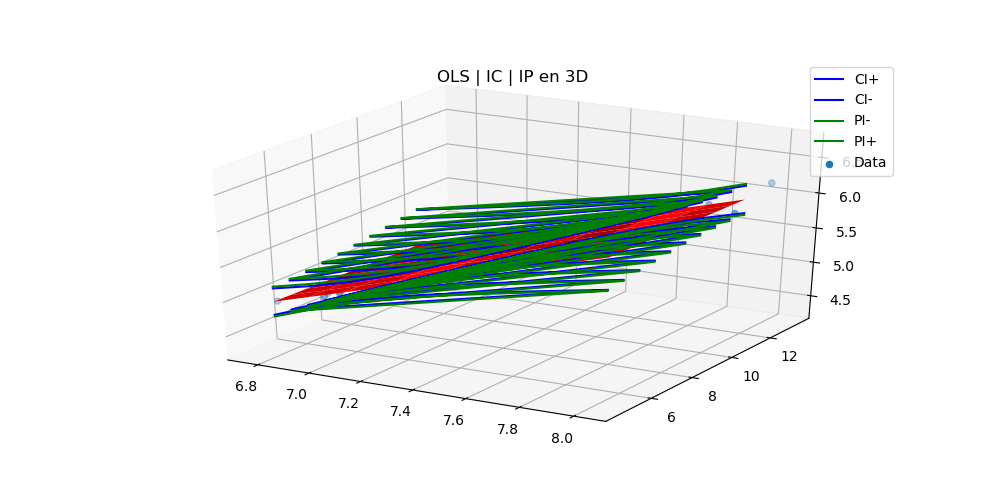

Text(0.5,0.92,'OLS | IC | IP en 3D')

In [13]:
#option pour tourner le graph
%matplotlib notebook 

#plot en 3 dimensions du modèle et de ses IC & IP
plt.figure(figsize=(10,5))

ax = plt.gca(projection='3d')
ax.scatter(lnGnp, df['interest'], lnInv, label="Data")
p1 = np.linspace(np.log(873), np.log(3058), 10,endpoint=True)
p2 = np.linspace(5, 11.5, 10, endpoint= True)
P1, P2 = np.meshgrid(p1,p2)
estim3D = Beta2[0]+ Beta2[1]*P1 + Beta2[2]*P2
len(P1)
ecartCIP3 =np.zeros((len(P1), len(P1)))
ecartPIP3 =np.zeros((len(P1), len(P1)))
for i in range(0, len(P1)) :
    for j in range(0,  len(P1)) :
        ecartCIP3[i,j] = EcartCI(np.array([1, P1.item(i,j), P2.item(i,j)]))
        ecartPIP3[i,j] = EcartPI(np.array([1, P1.item(i,j), P2.item(i,j)]))

CIm = estim3D + ecartCIP3
CIp = estim3D - ecartCIP3
PIm = estim3D + ecartPIP3
PIp = estim3D - ecartPIP3


ax.plot_surface(P1, P2, estim3D, color='r')
ax.plot(P1.flatten(), P2.flatten(), CIm.flatten(), color='b', label = 'CI+')
ax.plot(P1.flatten(), P2.flatten(), CIp.flatten(), color='b', label = 'CI-')
ax.plot(P1.flatten(), P2.flatten(), PIm.flatten(), color='g', label = 'PI-')
ax.plot(P1.flatten(), P2.flatten(), PIp.flatten(), color='g', label = 'PI+')
ax.legend()
plt.show()
plt.title('OLS | IC | IP en 3D')



=========================================================================================================================
13) En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient de
détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 et interest 10. 
La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire.
Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [14]:
#-- 
#Le principe est identique à la question 7
regr2 = linear_model.LinearRegression()
regr2.fit(Xpt3, Ypt1)

# l'intercept
print('Intercept: \n', round(regr2.intercept_[0],3))
# les coefficients
print('Coefficients: \n' + str(round(regr2.coef_[0][1],3)) +' Le premier coefficient lnGnp \n' 
      + str(round(regr2.coef_[0][2],3)) +' Le second coefficient Interest')


# calcul du y_hat
y_estim4 = regr2.predict(Xpt3)

# calcul du R²
print('R² %.2f' % r2_score(Ypt1, y_estim4))
#deuxieme façon de calculer : regr.score(GnpInter, lnInv)

# calcul du modèle predit quand gnp vaut 1000 et int = 10(a voir s'il existe une fonction)
Prediction4 = regr2.intercept_ + regr2.coef_[0][1] * math.log(1000) + regr2.coef_[0][2] * 10
print("Valeur de l\'estimation quand la variable expliquée sont log(1000) et 10 : " + str(round(Prediction4[0],3)))

Intercept: 
 -2.18
Coefficients: 
1.051 Le premier coefficient lnGnp 
-0.007 Le second coefficient Interest
R² 0.96
Valeur de l'estimation quand la variable expliquée sont log(1000) et 10 : 5.016
